In [1]:
import pandas as pd

In [26]:
df = pd.read_csv('../data/kuairec/interaction.csv', header=None, names=['user_id', 'video_id', 'watch_ratio', 'timestamp'])
df.head()

,user_id,video_id,watch_ratio,timestamp
0,14,148,0.722103,1.593898e+09
1,14,183,1.907377,1.593898e+09
2,14,3649,2.063311,1.593898e+09
3,14,5262,0.566388,1.593898e+09
4,14,8234,0.418364,1.593899e+09


In [28]:
# 过滤掉timestamp含有缺失值的行
df = df.dropna(subset=['timestamp'])
# 过滤掉watch_ratio为0的行
df = df[df['watch_ratio'] > 0]

In [29]:
print(f"用户数量: {df['user_id'].nunique()}")
print(f"视频数量: {df['video_id'].nunique()}")
print(f"交互数量: {len(df)}")

用户数量: 1411
视频数量: 3327
交互数量: 4465531


In [30]:
# 统计每个用户的交互物品数量
user_interact_counts = df.groupby('user_id')['video_id'].nunique()

print(f"每个用户最少交互的物品个数: {user_interact_counts.min()}")
print(f"每个用户最多交互的物品个数: {user_interact_counts.max()}")
print(f"每个用户平均交互的物品个数: {user_interact_counts.mean():.2f}")

每个用户最少交互的物品个数: 1636
每个用户最多交互的物品个数: 3296
每个用户平均交互的物品个数: 3164.80


In [31]:
print(f"观看时长比例最小值: {df['watch_ratio'].min():.4f}")
print(f"观看时长比例最大值: {df['watch_ratio'].max():.4f}")

观看时长比例最小值: 0.0000
观看时长比例最大值: 571.5214


In [32]:
tmp = df[df['watch_ratio'] == 0]
tmp.head()

,user_id,video_id,watch_ratio,timestamp


In [33]:
# 计算watch_ratio等于0的比例
zero_ratio = (df['watch_ratio'] == 0).mean()
print(f"观看时长比例为0的占比: {zero_ratio:.4%}")

观看时长比例为0的占比: 0.0000%


f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35266 (\N{CJK UNIFIED IDEOGRAPH-89C2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30475 (\N{CJK UNIFIED IDEOGRAPH-770B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6})

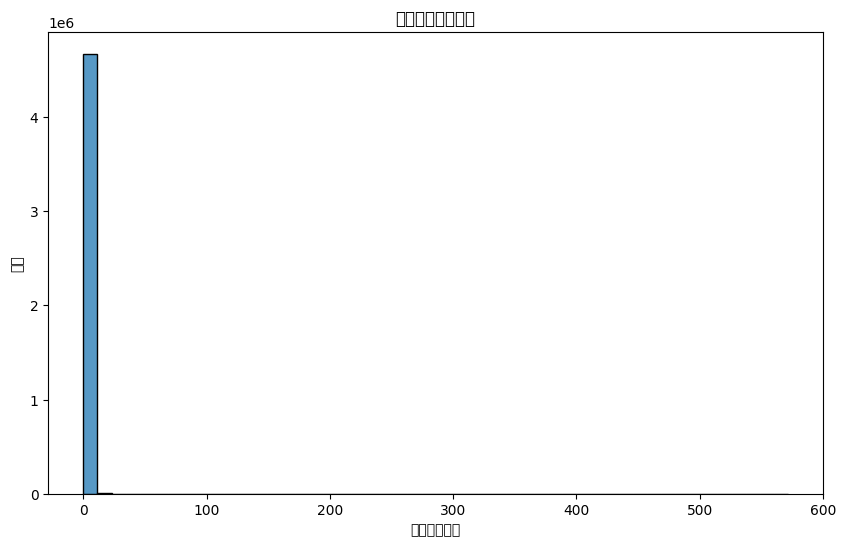

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='watch_ratio', bins=50)
plt.title('观看时长比例分布')
plt.xlabel('观看时长比例')
plt.ylabel('频数')
plt.show()